# Libraries

In [1]:
import joblib
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, Pool, CatBoostRegressor, CatBoostRanker
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare Data

In [2]:
# Load from pkl
xall, yall, harai = joblib.load("./data.pkl")

In [3]:
# Input features
xall

,raceid,horseid,racedate,futan,umaban,wakuban,blinker,age,bataijyu,zogen,...,grade_5,wintime_5,lap_s3_5,lap_s4_5,lap_l3_5,lap_l4_5,f,ff,m,mf
0,2020010506010101,2017103291,20200105,54.0,1,1,0,3.0,432.0,4.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220057e+09,1.120002e+09
1,2020010506010101,2017101861,20200105,54.0,2,1,0,3.0,424.0,-4.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.140004e+09,1.220063e+09,1.120002e+09
2,2020010506010101,2017103186,20200105,54.0,3,2,0,3.0,458.0,0.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220061e+09,1.140006e+09
3,2020010506010101,2017102095,20200105,53.0,4,2,0,3.0,464.0,10.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220062e+09,1.120002e+09
4,2020010506010101,2017103287,20200105,52.0,5,3,1,3.0,460.0,-2.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.140006e+09,1.220062e+09,1.140005e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143318,2022122809060912,2018105223,20221228,53.0,12,6,0,4.0,452.0,0.0,...,E,69.4,33.6,45.3,35.8,46.9,1.140007e+09,1.140005e+09,1.220065e+09,1.140006e+09
143319,2022122809060912,2017106137,20221228,56.0,13,7,0,5.0,492.0,6.0,...,E,67.3,32.8,44.1,34.5,45.4,1.120002e+09,1.140004e+09,1.220050e+09,1.120002e+09
143320,2022122809060912,2017100461,20221228,56.0,14,7,0,5.0,504.0,4.0,...,E,80.4,35.6,47.1,33.3,44.8,1.120002e+09,1.140004e+09,1.220055e+09,1.120002e+09
143321,2022122809060912,2018106389,20221228,52.0,15,8,0,4.0,434.0,2.0,...,E,68.4,33.7,45.0,34.7,45.7,1.120002e+09,1.140005e+09,1.220063e+09,1.120002e+09


In [4]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
print(xall.columns)

Index(['raceid', 'horseid', 'racedate', 'futan', 'umaban', 'wakuban',
       'blinker', 'age', 'bataijyu', 'zogen',
       ...
       'grade_5', 'wintime_5', 'lap_s3_5', 'lap_s4_5', 'lap_l3_5', 'lap_l4_5',
       'f', 'ff', 'm', 'mf'],
      dtype='object', length=224)


In [5]:
# # Output feature: finishing position (0: race not finished)
yall

0          2
1         12
2          3
3         11
4          8
          ..
143318    12
143319    16
143320    11
143321     7
143322     8
Name: jyuni, Length: 143323, dtype: int64

In [6]:
# Payout
harai

,RaceID,TorokuTosu,SyussoTosu,FuseirituFlag,TokubaraiFlag,HenkanFlag,HenkanUma,HenkanWaku,HenkanDoWaku,PayTansyo,...,PayReserved1,PayUmatan,PaySanrenpuku,PaySanrentan,Year,MonthDay,JyoCD,Kaiji,Nichiji,RaceNum
0,2020010606010203,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '09', 'Pay': '000000200', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0913', 'Pay': '000000510', 'Ninki':...","[{'Kumi': '080913', 'Pay': '000001270', 'Ninki...","[{'Kumi': '091308', 'Pay': '000003840', 'Ninki...",2020,0106,06,01,02,03
1,2022010507010112,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '13', 'Pay': '000001530', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '1315', 'Pay': '000004070', 'Ninki':...","[{'Kumi': '061315', 'Pay': '000002720', 'Ninki...","[{'Kumi': '131506', 'Pay': '000026590', 'Ninki...",2022,0105,07,01,01,12
2,2020010506010101,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '07', 'Pay': '000000360', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0701', 'Pay': '000003650', 'Ninki':...","[{'Kumi': '010307', 'Pay': '000098210', 'Ninki...","[{'Kumi': '070103', 'Pay': '000280650', 'Ninki...",2020,0105,06,01,01,01
3,2020010606010204,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '12', 'Pay': '000000280', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '1211', 'Pay': '000003040', 'Ninki':...","[{'Kumi': '031112', 'Pay': '000000920', 'Ninki...","[{'Kumi': '121103', 'Pay': '000008340', 'Ninki...",2020,0106,06,01,02,04
4,2020010606010205,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '07', 'Pay': '000000380', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0716', 'Pay': '000001730', 'Ninki':...","[{'Kumi': '070916', 'Pay': '000002130', 'Ninki...","[{'Kumi': '071609', 'Pay': '000009690', 'Ninki...",2020,0106,06,01,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,2022122806050903,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '01', 'Pay': '000000600', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0107', 'Pay': '000004600', 'Ninki':...","[{'Kumi': '010307', 'Pay': '000023600', 'Ninki...","[{'Kumi': '010703', 'Pay': '000094870', 'Ninki...",2022,1228,06,05,09,03
10364,2022122806050902,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '04', 'Pay': '000000750', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0406', 'Pay': '000030980', 'Ninki':...","[{'Kumi': '040611', 'Pay': '000013110', 'Ninki...","[{'Kumi': '040611', 'Pay': '000138570', 'Ninki...",2022,1228,06,05,09,02
10365,2022122809060911,13,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
print(harai.columns)

Index(['RaceID', 'TorokuTosu', 'SyussoTosu', 'FuseirituFlag', 'TokubaraiFlag',
       'HenkanFlag', 'HenkanUma', 'HenkanWaku', 'HenkanDoWaku', 'PayTansyo',
       'PayFukusyo', 'PayWakuren', 'PayUmaren', 'PayWide', 'PayReserved1',
       'PayUmatan', 'PaySanrenpuku', 'PaySanrentan', 'Year', 'MonthDay',
       'JyoCD', 'Kaiji', 'Nichiji', 'RaceNum'],
      dtype='object')


In [8]:
print(harai.columns)

Index(['RaceID', 'TorokuTosu', 'SyussoTosu', 'FuseirituFlag', 'TokubaraiFlag',
       'HenkanFlag', 'HenkanUma', 'HenkanWaku', 'HenkanDoWaku', 'PayTansyo',
       'PayFukusyo', 'PayWakuren', 'PayUmaren', 'PayWide', 'PayReserved1',
       'PayUmatan', 'PaySanrenpuku', 'PaySanrentan', 'Year', 'MonthDay',
       'JyoCD', 'Kaiji', 'Nichiji', 'RaceNum'],
      dtype='object')


In [9]:
print(harai["PaySanrentan"][0])

[{'Kumi': '091308', 'Pay': '000003840', 'Ninki': '0006'}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}]


In [10]:
'''
Preprocess data
'''

# Convert string values to float
for col in xall.columns:
    if xall[col].dtype == "object":
        # Convert to numeric where possible
        xall[col] = pd.to_numeric(xall[col], errors='coerce')
        # Replace NaN (from non-numeric values) with 0
        xall[col] = xall[col].fillna(0)
        print(f"Converted column: {col}")

Converted column: KisyuCode
Converted column: TozaiCD
Converted column: ChokyosiCode
Converted column: BanusiCode
Converted column: course
Converted column: cls
Converted column: grade
Converted column: BreederCode
Converted column: KisyuCode_1
Converted column: course_1
Converted column: cls_1
Converted column: grade_1
Converted column: KisyuCode_2
Converted column: course_2
Converted column: cls_2
Converted column: grade_2
Converted column: KisyuCode_3
Converted column: course_3
Converted column: cls_3
Converted column: grade_3
Converted column: KisyuCode_4
Converted column: course_4
Converted column: cls_4
Converted column: grade_4
Converted column: KisyuCode_5
Converted column: course_5
Converted column: cls_5
Converted column: grade_5


In [11]:
'''
Split into Train-Test data
'''
# Number of days to use of testing
TEST_DAYS = 90

# Date at which the data splits
rd = xall["racedate"].unique()[-TEST_DAYS] 

# split data
xtrain = xall[xall['racedate']<rd].reset_index(drop=True).copy()
ytrain = yall[xtrain.index].reset_index(drop=True).copy()
xtest = xall[xall['racedate']>=rd].reset_index(drop=True).copy()
ytest = yall[xtest.index].reset_index(drop=True).copy()

In [12]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(104436, 224) (104436,) (38887, 224) (38887,)


# Evaluation Baseline

In [97]:
def evaluate(xtest, ytest, ypred, harai, apply_bet):
    # Real rankings - jyuni is matrix of shape (num_races × 18)
    tmp = xtest.copy()
    tmp["jyuni"] = ytest
    tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
    jyuni = np.array([[tmp[i][j] if j < len(tmp[i]) else j+1 for j in range(18)]
                      for i in range(tmp.shape[0])])

    # Predicted ranking -  'pred' is a matrix of shape (num_races × 18)
    tmp = xtest.copy()
    tmp["pred"] = ypred
    tmp = tmp.groupby("raceid", as_index=False).apply(
        lambda x: np.argsort(np.argsort(-x["pred"].values)) + 1
    )
    pred = np.array([[tmp[i][j] if j < len(tmp[i]) else j+1 for j in range(18)]
                     for i in range(tmp.shape[0])])

    # df_bet: extract unique raceid rows
    df_bet = xtest[["raceid"]].groupby("raceid", as_index=False).apply(lambda x: x.iloc[0])

    # Align payout data
    harai = harai.copy()
    harai.columns = [x.replace("RaceID", "raceid") for x in harai.columns]
    harai.raceid = harai.raceid.astype(int)

    mrr, total_payout, profit, return_rate = apply_bet(pred, jyuni, df_bet, harai, xtest)

    return mrr, total_payout, profit, return_rate


def apply_bet_tansyo(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx = np.where(jyuni[i] == 1)[0]
        if idx.size > 0:
            res.append(1.0 / pred[i, idx[0]])
    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Tansyo: #1
    predicted_bet = [[f"{np.where(pred[i] == 1)[0][0] + 1:02}"] for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for raceid in df_bet["raceid"]:
        pred_tickets = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [x["Umaban"] for x in tmp["PayTansyo"] if x["Umaban"].strip() != ""]
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayTansyo"]
               if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(int(tmp["HenkanUma"][int(p)-1]) for p in pred_tickets)

        res.append({
            "raceid": raceid,
            "pred": pred_tickets,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int).values

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu))
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai_val))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val)


def apply_bet_fukusyo(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx = np.where(jyuni[i] <= 3)[0]
        if idx.size > 0:
            res.append(np.mean([1.0 / pred[i, j] for j in idx]))
    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Fukusyo: #1
    predicted_bet = [[f"{np.argsort(pred[i])[0] + 1:02}"] for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for raceid in df_bet["raceid"]:
        pred_tickets = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [x["Umaban"] for x in tmp["PayFukusyo"] if x["Umaban"].strip() != ""]
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayFukusyo"]
               if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(int(tmp["HenkanUma"][int(p)-1]) for p in pred_tickets)

        res.append({
            "raceid": raceid,
            "pred": pred_tickets,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int).values

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu))
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai_val))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val)


def apply_bet_fukusyo_three(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx = np.where(jyuni[i] <= 3)[0]
        if idx.size > 0:
            res.append(np.mean([1.0 / pred[i, j] for j in idx]))
    mrr = np.mean(res)
    print("MRR:", mrr)

    # Predicted bet: Fukusyo on top 3 predicted horses
    predicted_bet = [
        [f"{h+1:02}" for h in np.argsort(pred[i])[:3]]
        for i in range(pred.shape[0])
    ]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for raceid in df_bet["raceid"]:
        pred_tickets = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [x["Umaban"] for x in tmp["PayFukusyo"] if x["Umaban"].strip() != ""]
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayFukusyo"]
               if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(int(tmp["HenkanUma"][int(p)-1]) for p in pred_tickets)

        res.append({
            "raceid": raceid,
            "pred": pred_tickets,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int).values

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100

    print("Number of races:", df_res.shape[0])
    print("Number of hits:", np.sum(tekichu))
    print("Hit rate:", np.mean(tekichu))
    print("Total payout:", np.sum(modoshi))
    print("Return rate:", np.mean(modoshi / harai_val))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val)


def apply_bet_wakuren(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    tmp = xtest.copy()
    tmp["wakuban"] = (tmp["umaban"].astype(int) + 1) // 2

    tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["wakuban"].values)

    bracket_ids = np.array([
        [tmp[i][j] if j < len(tmp[i]) else -1 for j in range(18)]
        for i in range(tmp.shape[0])
    ])
    res = []

    for i in range(jyuni.shape[0]):
        true_idx = np.where(jyuni[i] <= 2)[0]
        if true_idx.size < 2:
            continue

        true_brackets = set(bracket_ids[i, true_idx])

        br_rank = {}
        for b in np.unique(bracket_ids[i]):
            if b == -1:
                continue
            br_rank[b] = np.min(pred[i, bracket_ids[i] == b])

        pair_rank = max(br_rank[b] for b in true_brackets)
        res.append(1 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)
    
    # Predicted bet - Wakuren: #1 and #2 brackets (any order)
    predicted_bet = []
    for i in range(pred.shape[0]):
        br_rank = {}
        for b in np.unique(bracket_ids[i]):
            if b == -1:
                continue
            br_rank[b] = np.min(pred[i, bracket_ids[i] == b])

        top2_brackets = sorted(br_rank, key=br_rank.get)[:2]
        predicted_bet.append(top2_brackets)

    df_bet["predicted_bet"] = predicted_bet
    
    res = []
    for _, row in df_bet.iterrows():
        raceid = row["raceid"]
        pred_brackets = row["predicted_bet"]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        # True winners (pay table)
        true = [x["Umaban"] for x in tmp["PayWakuren"] if x["Umaban"].strip() != ""]

        # Pay table
        pay = {
            x["Umaban"]: int(x["Pay"])
            for x in tmp["PayWakuren"]
            if x["Umaban"].strip() != "" and x["Pay"].strip() != ""
        }

        # Create pred_key in general: sorted numbers concatenated
        pred_key = "".join(sorted(str(b) for b in pred_brackets))

        # Henkan ignored for Wakuren (bracket-based)
        henkan = 0

        res.append({
            "raceid": raceid,
            "pred": pred_key,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(lambda x: x["pred"] in x["true"], axis=1).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1),
          np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100, axis=1).values
    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai), np.std(modoshi / harai, ddof=1),
          np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai)



def apply_bet_umaren(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        true_idx = np.where(jyuni[i] <= 2)[0]
        if true_idx.size < 2:
            continue

        pred_ranks = [pred[i, idx] for idx in true_idx]
        pair_rank = max(pred_ranks)
        res.append(1 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Umaren: #1 and #2 (any order)
    predicted_bet = [list(np.argsort(pred[i])[:2] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for _, row in df_bet.iterrows():
        raceid = row["raceid"]
        pred_pair = row["predicted_bet"]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]]))
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != ""
        ]

        pay = {
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]])): int(x["Pay"])
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred_pair
            if 1 <= h <= len(tmp["HenkanUma"])
        )

        pred_key = "".join(sorted(f"{h:02}" for h in pred_pair))

        res.append({
            "raceid": raceid,
            "pred": pred_key,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1),
          np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(len(df_res)) * 100

    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai),
          np.std(modoshi / harai, ddof=1),
          np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi/harai)


def apply_bet_wide(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        top3_idx = np.where(jyuni[i] <= 3)[0]
        if top3_idx.size < 2:
            continue

        best_score = 0.0
        for a in range(len(top3_idx)):
            for b in range(a + 1, len(top3_idx)):
                h1, h2 = top3_idx[a], top3_idx[b]
                pair_rank = max(pred[i, h1], pred[i, h2])
                best_score = max(best_score, 1.0 / pair_rank)

        res.append(best_score)

    mrr = np.mean(res)
    print("MRR:", mrr)

    # Prediction
    predicted_bet = []
    for i in range(pred.shape[0]):
        top3 = np.argsort(pred[i])[:3]
        pairs = [[top3[j] + 1, top3[k] + 1] for j in range(3) for k in range(j + 1, 3)]
        predicted_bet.append(pairs)

    df_bet["predicted_bet"] = predicted_bet

    # Compute Payout
    res = []
    for raceid in df_bet["raceid"]:
        pred_pairs = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]]))
            for x in tmp["PayWide"]
            if x["Kumi"].strip() != ""
        ]

        pay = {
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]])): int(x["Pay"])
            for x in tmp["PayWide"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        flat_horses = sorted(set(h for pair in pred_pairs for h in pair))
        henkan = sum(int(tmp["HenkanUma"][h - 1]) for h in flat_horses)

        pred_str = [
            "".join(sorted([f"{a:02}", f"{b:02}"]))
            for a, b in pred_pairs
        ]

        res.append({
            "raceid": raceid,
            "pred": pred_str,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    # Compute Hit Rate
    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int)

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = np.full(df_res.shape[0], 3 * 100)

    print("Number of races:", df_res.shape[0])
    print("Number of hits:", tekichu.sum())
    print("Hit rate:", tekichu.mean())
    print("Total payout:", modoshi.sum())
    print("Return rate:", np.mean(modoshi / harai_val),
          np.std(modoshi / harai_val, ddof=1),
          np.std(modoshi / harai_val, ddof=1) / np.sqrt(df_res.shape[0]))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val)


def apply_bet_sanrenpuku(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        top3_idx = np.where(jyuni[i] <= 3)[0]
        if top3_idx.size < 3:
            continue

        ranks = pred[i, top3_idx]
        comb_rank = np.max(ranks)
        res.append(1.0 / comb_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)
    

    # Predicted bet - Sanrenpuku: #1 and #2 and #3 (any order)
    predicted_bet = [list(np.argsort(pred[i])[:3] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"] == raceid]["predicted_bet"].values[0]

        # Select target race
        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            "".join(sorted([
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ]))
            for x in tmp["PaySanrenpuku"]
            if x["Kumi"].strip() != ""
        ]
        
        # Compute Pay for the true winners
        pay = {
            "".join(sorted([
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ])): int(x["Pay"])
            for x in tmp["PaySanrenpuku"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred
            if (
                h - 1 < len(tmp["HenkanUma"])
                and str(tmp["HenkanUma"][h - 1]).strip() != ""
            )
        )

        # convert rankings from int to string
        pred_str = "".join(sorted(f"{h:02}" for h in pred))
           
        res.append({
            "pred": pred_str,
            "true": true,
            "pay": pay,
            "henkan": henkan,
            "raceid": raceid
        })     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print(
        "Hit rate",
        np.mean(tekichu),
        np.std(tekichu, ddof=1),
        np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0])
    )

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print(
        "Return rate",
        np.mean(modoshi / harai),
        np.std(modoshi / harai, ddof=1),
        np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0])
    )
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai)


def apply_bet_umatan(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx_1 = np.where(jyuni[i] == 1)[0]
        idx_2 = np.where(jyuni[i] == 2)[0]

        if idx_1.size == 0 or idx_2.size == 0:
            continue

        h1 = idx_1[0]
        h2 = idx_2[0]

        pair_rank = max(pred[i, h1], pred[i, h2])
        res.append(1.0 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Umatan: #1 and #2 (exact order)
    predicted_bet = [list(np.argsort(pred[i])[:2] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"] == raceid]["predicted_bet"].values[0]

        # Select target race
        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            (x["Kumi"][:2], x["Kumi"][2:])
            for x in tmp["PayUmatan"]
            if x["Kumi"].strip() != ""
        ]

        # Compute Pay for the true winners
        pay = {
            (x["Kumi"][:2], x["Kumi"][2:]): int(x["Pay"])
            for x in tmp["PayUmatan"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred
            if h - 1 < len(tmp["HenkanUma"]) and str(tmp["HenkanUma"][h - 1]).strip() != ""
        )

        # convert rankings from int to string
        pred_str = (f"{pred[0]:02}", f"{pred[1]:02}")

        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print(
        "Hit rate",
        np.mean(tekichu),
        np.std(tekichu, ddof=1),
        np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0])
    )

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print(
        "Return rate",
        np.mean(modoshi / harai),
        np.std(modoshi / harai, ddof=1),
        np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0])
    )
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai)


def apply_bet_sanrentan(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        first = np.where(jyuni[i] == 1)[0]
        second = np.where(jyuni[i] == 2)[0]
        third = np.where(jyuni[i] == 3)[0]

        if first.size == 0 or second.size == 0 or third.size == 0:
            continue

        r1 = pred[i, first[0]]
        r2 = pred[i, second[0]]
        r3 = pred[i, third[0]]

        comb_rank = max(r1, r2, r3)
        res.append(1.0 / comb_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Sanrentan: #1 and #2 and #3 (exact order)
    predicted_bet = [
        list(np.argsort(pred[i])[:3] + 1)
        for i in range(pred.shape[0])
    ]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"] == raceid]["predicted_bet"].values[0]

        # Select target race
        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            (
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            )
            for x in tmp["PaySanrentan"]
            if x["Kumi"].strip() != ""
        ]

        # Compute Pay for the true winners
        pay = {
            (
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ): int(x["Pay"])
            for x in tmp["PaySanrentan"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred
            if h - 1 < len(tmp["HenkanUma"]) and str(tmp["HenkanUma"][h - 1]).strip() != ""
        )

        # convert rankings from int to string
        pred_str = tuple(f"{x:02}" for x in pred)
           
        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print(
        "Hit rate",
        np.mean(tekichu),
        np.std(tekichu, ddof=1),
        np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0])
    )

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print(
        "Return rate",
        np.mean(modoshi / harai),
        np.std(modoshi / harai, ddof=1),
        np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0])
    )
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai)


# Winner prediction

## Models

In [14]:
model_prediction_winner = {}

### Light Gradient Boosting Machine (Binary)

In [15]:
# Binarize outputs (simplify ranking to win / lose)
ytrain_lgb = ytrain.apply(lambda x: 1 if x==1 else 0)
ytest_lgb = ytest.apply(lambda x: 1 if x==1 else 0)

In [16]:
# Training parameters
num_boost_round = 100
early_stopping_round = 10
lgb_train_parameters = {
 'max_depth': 10,
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'seed': 1,
 'objective': 'binary',
 'metric': 'binary_logloss',
}

In [17]:
# Validation data (training_data=validation_data）
xtrain_val = xtrain.copy()
ytrain_val_lgb = ytrain_lgb.copy()
xtest_val = xtrain.copy()
ytest_val_lgb = ytrain_lgb.copy()

In [18]:
# Prepare dataset for LGB model
train_data_lgb = lgb.Dataset(xtrain_val, label=ytrain_val_lgb)
valid_data_lgb = lgb.Dataset(xtest_val, label=ytest_val_lgb)

In [19]:
# Train a LGB model on our dataset
gbm = lgb.train(lgb_train_parameters,
                train_data_lgb,
                valid_sets=[valid_data_lgb],
                num_boost_round=num_boost_round,
                callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_round,
                            verbose=1)]
               )

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Number of positive: 7532, number of negative: 96904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17338
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 212
[LightGBM] [Warning] Provided 

In [20]:
# Predict
ypred = gbm.predict(xtest)
model_prediction_winner['LightGBM'] = ypred

### XGBoost (Binary)

In [21]:
# XGBoost Official Defaults Baseline
xgb_train_param = {
    "n_estimators": 100,
    "max_depth": 6,
    "learning_rate": 0.3,
    "objective": 'binary:logistic',
    "random_state": 42  # reproducibility
}

In [22]:
# 1. Initialize with the Classifier
bst = xgb.XGBClassifier(**xgb_train_param)
# 2. Fit model
# Note: Ensure ytrain is binary (0 or 1)
bst.fit(xtrain, ytrain)
# 3. FIX: Use predict_proba to get continuous scores
# [:, 1] selects the probability for the 'Win' class
ypred = bst.predict_proba(xtest)[:, 1]
model_prediction_winner['XGBoost'] = ypred
print("XGBoost Winner Strategy fixed: Now using probabilities.")

XGBoost Winner Strategy fixed: Now using probabilities.


### Catboost (Binary)

In [23]:
# Standard Baseline Parameters
cb_train_param = {
    "iterations": 1000,         # Standard default
    "learning_rate": None,      # Automatically scales based on dataset size
    "depth": 6,                 # The "Goldilocks" depth for CatBoost
    "loss_function": 'Logloss', # Standard for binary
    "bootstrap_type": 'MVS',    # Standard for CPU training
    "verbose": 100              # Standard to see if it's actually learning
}

In [24]:
# 1. Initialize
# We use the parameters from your Cell 1
bst = CatBoostClassifier(**cb_train_param)
# 2. Fit the model
# Using (ytrain == 1) ensures we are predicting ONLY the 1st place winner
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get the continuous winning probability
# [:, 1] grabs the probability of being the winner (Class 1)
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['CatBoost'] = ypred
print("CatBoost Winner Strategy fixed: Continuous probabilities generated.")

Learning rate set to 0.074986
0:	learn: 0.6027906	total: 68.5ms	remaining: 1m 8s
100:	learn: 0.2020550	total: 2.38s	remaining: 21.2s
200:	learn: 0.1972165	total: 4.37s	remaining: 17.4s
300:	learn: 0.1920777	total: 6.35s	remaining: 14.7s
400:	learn: 0.1870432	total: 8.47s	remaining: 12.7s
500:	learn: 0.1822325	total: 10.7s	remaining: 10.7s
600:	learn: 0.1779849	total: 12.9s	remaining: 8.55s
700:	learn: 0.1734606	total: 15.1s	remaining: 6.43s
800:	learn: 0.1695032	total: 17.1s	remaining: 4.24s
900:	learn: 0.1656794	total: 19.1s	remaining: 2.1s
999:	learn: 0.1617462	total: 21.1s	remaining: 0us
CatBoost Winner Strategy fixed: Continuous probabilities generated.


### Random Forest Classifier

In [25]:
# Random Forest Official Defaults Baseline
rf_train_param = {
    "n_estimators": 100,
    "max_depth": None,      # Traditional RF baseline allows deep trees
    "random_state": 42,     # For reproducible results
    "n_jobs": -1            # Uses all available CPU cores (highly recommended)
}

In [26]:
# 1. Initialize the Classifier
bst = RandomForestClassifier(**rf_train_param)
# 2. Fit the model
# We ensure ytrain is binary (1 for win, 0 for everything else)
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get the continuous winning probability
# [:, 1] extracts the probability of the "Win" class
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['RandomForest'] = ypred
print("Random Forest Winner Strategy fixed: Continuous probabilities generated.")

Random Forest Winner Strategy fixed: Continuous probabilities generated.


### Logistic Regression

In [27]:
# Logistic Regression Official Defaults Baseline
logreg_train_param = {
    "penalty": 'l2',
    "C": 1.0,
    "solver": 'lbfgs',
    "max_iter": 1000, # Increased to ensure convergence with many features
    "random_state": 42
}

In [28]:
# 1. Create a Pipeline: Impute (Fill NaNs) -> Scale (Normalize) -> Model
bst = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler(),
    LogisticRegression(**logreg_train_param)
)
# 2. Fit the model
# (ytrain == 1) ensures we are targeting only the winners
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get continuous winning probabilities
# [:, 1] extracts the probability for the "Win" class
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['LogisticRegression'] = ypred
print("Logistic Regression Winner Strategy fixed: Continuous probabilities generated.")

/home/noah/gakusai/Horse-Racing/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Logistic Regression Winner Strategy fixed: Continuous probabilities generated.


In [29]:
print (model_prediction_winner)

{'LightGBM': array([0.07041626, 0.03553426, 0.03783245, ..., 0.05919513, 0.02893051,
       0.06001361], shape=(38887,)), 'XGBoost': array([0.03809795, 0.00461143, 0.01389008, ..., 0.02950272, 0.00159297,
       0.01950072], shape=(38887,), dtype=float32), 'CatBoost': array([0.03234616, 0.01271957, 0.01241179, ..., 0.02537089, 0.00177007,
       0.0187347 ], shape=(38887,)), 'RandomForest': array([0.05, 0.01, 0.05, ..., 0.14, 0.08, 0.11], shape=(38887,)), 'LogisticRegression': array([0.11475826, 0.01563384, 0.03951771, ..., 0.02831218, 0.00126649,
       0.05032908], shape=(38887,))}


## Evaluation

### Tansyo

In [30]:
# Evaluate every model
results_winner_tansyo = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_winner_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23596079440398804
Number of races 2856
Number of hits 976
Hit rate 0.34173669467787116
Total payout 235830
Return rate 0.8257352941176471
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23710281024863278
Number of races 2856
Number of hits 925
Hit rate 0.3238795518207283
Total payout 238000
Return rate 0.8333333333333334
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23312770577216174
Number of races 2856
Number of hits 930
Hit rate 0.32563025210084034
Total payout 231840
Return rate 0.8117647058823529
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23227548241278068
Number of races 2856
Number of hits 887
Hit rate 0.31057422969187676
Total payout 224500
Return rate 0.7860644257703081
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.236276597628758
Number of races 2856
Number of hits 938
Hit rate 0.3284313725490196
Total payout 238020
Return rate 0.8334033613445377


### Fukusyo

In [91]:
# Evaluate every model
results_winner_fukusyo = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_winner_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24037230131402737
Number of races 2856
Number of hits 1841
Hit rate 0.6446078431372549
Total payout 241090
Return rate 0.8441526610644258
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24083261549228124
Number of races 2856
Number of hits 1800
Hit rate 0.6302521008403361
Total payout 245080
Return rate 0.85812324929972
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24145805067640325
Number of races 2856
Number of hits 1817
Hit rate 0.636204481792717
Total payout 242940
Return rate 0.8506302521008404
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23996139529745392
Number of races 2856
Number of hits 1760
Hit rate 0.6162464985994398
Total payout 237410
Return rate 0.831267507002801
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23990523887548446
Number of races 2856
Number of hits 1784
Hit rate 0.6246498599439776
Total payout 242660
Return rate 0.8496498599439776


### Fukusyo Three

In [90]:
# Evaluate every model
results_winner_fukusyo_three = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo_three)
    results_winner_fukusyo_three[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.24037230131402737
Number of races: 2856
Number of hits: 2666
Hit rate: 0.9334733893557423
Total payout: 704720
Return rate: 0.8225023342670401
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.24083261549228124
Number of races: 2856
Number of hits: 2641
Hit rate: 0.9247198879551821
Total payout: 706270
Return rate: 0.824311391223156
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.24145805067640325
Number of races: 2856
Number of hits: 2662
Hit rate: 0.9320728291316527
Total payout: 715350
Return rate: 0.8349089635854342
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.23996139529745392
Number of races: 2856
Number of hits: 2611
Hit rate: 0.9142156862745098
Total payout: 691970
Return rate: 0.8076213818860878
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.23990523887548446
Number of races: 2856
Number of hits: 2649
Hit rate: 0.9275210084033614
Total payout: 708500
Return rate: 0.8269140989729226


### Wakuren

In [98]:
# Evaluate every model
results_winner_wakuren = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_winner_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1690329064737981
Number of races 2856
Number of hits 200
Hit rate 0.0700280112044818 0.255238906497871 0.004776038002589699
Total payout 169330
Return rate 0.5928921568627451 3.946013338132938 0.07383791883548893
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1686761453425746
Number of races 2856
Number of hits 175
Hit rate 0.061274509803921566 0.23987515782801908 0.004488551080959035
Total payout 143590
Return rate 0.502766106442577 3.5635274515062907 0.06668083155969651
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16955537459739142
Number of races 2856
Number of hits 193
Hit rate 0.06757703081232493 0.2510626334265112 0.004697891456784102
Total payout 164290
Return rate 0.5752450980392158 3.897333042425765 0.07292701169572377
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16720989098891106
Number of races 2856
Number of hits 193
Hit rate 0.06757703081232493 0.2510626334265112 0.004697891456784102
Total payout 178650
Return rate 0.6255252100840336 4.2264669040621925 0.0790857742945903
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16937804721667418
Number of races 2856
Number of hits 194
Hit rate 0.06792717086834733 0.25166494895582686 0.004709162002865937
Total payout 166250
Return rate 0.5821078431372549 3.948942783911596 0.0738927347119451
※Mean, standard deviation, standard error


### Umaren

In [34]:
# Evaluate every model
results_winner_umaren = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_winner_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10683218481181735
Number of races 2856
Number of hits 428
Hit rate 0.14985994397759103 0.35699659006234774 0.006680130801089021
Total payout 221890
Return rate 0.7769257703081233 2.1537089263632585 0.04030026542569199
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10728468377592433
Number of races 2856
Number of hits 408
Hit rate 0.14285714285714285 0.34998838395249104 0.006548993040118649
Total payout 244880
Return rate 0.8574229691876751 2.580063849727392 0.04827823142044642
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10758789197793613
Number of races 2856
Number of hits 411
Hit rate 0.14390756302521007 0.35105744267123107 0.0065689972986298605
Total payout 222770
Return rate 0.7800070028011206 2.2829075079749632 0.0427178331238334
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10694757117417705
Number of races 2856
Number of hits 395
Hit rate 0.13830532212885155 0.34528061521481135 0.006460901131611944
Total payout 229130
Return rate 0.8022759103641456 2.3660481737010612 0.04427356373135253
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10748972810253254
Number of races 2856
Number of hits 411
Hit rate 0.14390756302521007 0.35105744267123107 0.0065689972986298605
Total payout 224690
Return rate 0.7867296918767507 2.1568030320017364 0.04035816242233784
※Mean, standard deviation, standard error


### Wide

In [35]:
# Evaluate every model
results_winner_wide = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_winner_wide[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17458843894886358
Number of races: 2856
Number of hits: 1595
Hit rate: 0.5584733893557423
Total payout: 684330
Return rate: 0.798704481792717 1.0048635738607217 0.018803037052726672
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.1753165000615401
Number of races: 2856
Number of hits: 1519
Hit rate: 0.5318627450980392
Total payout: 695340
Return rate: 0.8115546218487396 1.1301660401702887 0.021147700525564812
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17513541382493697
Number of races: 2856
Number of hits: 1588
Hit rate: 0.5560224089635855
Total payout: 716760
Return rate: 0.8365546218487394 1.0794114789890727 0.020197979668614374
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17545314333601836
Number of races: 2856
Number of hits: 1461
Hit rate: 0.5115546218487395
Total payout: 668430
Return rate: 0.7801470588235295 1.1005388664734679 0.02059331597100427
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17513181179470774
Number of races: 2856
Number of hits: 1571
Hit rate: 0.5500700280112045
Total payout: 694100
Return rate: 0.810107376283847 1.0280073675980257 0.019236104408836757


### Sanrenpuku

In [36]:
# Evaluate every model
results_winner_sanrenpuku = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_winner_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0886391241302713
Number of races 2856
Number of hits 250
Hit rate 0.08753501400560224 0.28266696257841983 0.005289272602969698
Total payout 217310
Return rate 0.7608893557422969 3.02097636419213 0.05652859949244148
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08934658831440039
Number of races 2856
Number of hits 228
Hit rate 0.07983193277310924 0.2710802928258984 0.0050724624942727285
Total payout 230260
Return rate 0.8062324929971989 4.160117077937258 0.0778442343766133
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08921721334349732
Number of races 2856
Number of hits 258
Hit rate 0.09033613445378151 0.28671292312003754 0.005364980736846638
Total payout 241260
Return rate 0.8447478991596639 3.3805595044893284 0.06325712989838211
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08889518184260464
Number of races 2856
Number of hits 221
Hit rate 0.07738095238095238 0.2672417387751041 0.005000635356814979
Total payout 226070
Return rate 0.7915616246498599 3.23598563417274 0.06055185934113163
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08948169955218292
Number of races 2856
Number of hits 255
Hit rate 0.08928571428571429 0.28520563930700843 0.005336776397349613
Total payout 242310
Return rate 0.8484243697478993 3.2024658247827613 0.05992463567181444
※Mean, standard deviation, standard error


### Umatan

In [37]:
# Evaluate every model
results_winner_umatan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_winner_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11645448929027229
Number of races 2856
Number of hits 261
Hit rate 0.09138655462184873 0.2882084945617448 0.005392965914103465
Total payout 216360
Return rate 0.7575630252100841 2.794213224538806 0.05228540088517953
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11703985776277132
Number of races 2856
Number of hits 229
Hit rate 0.08018207282913166 0.27162242344555043 0.005082606858536596
Total payout 224780
Return rate 0.787044817927171 3.295406804917958 0.06166375005376442
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11721361327405579
Number of races 2856
Number of hits 239
Hit rate 0.08368347338935574 0.27696102254105287 0.005182502883443454
Total payout 216310
Return rate 0.7573879551820728 3.084582536911802 0.05771880008637394
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11633638130138241
Number of races 2856
Number of hits 217
Hit rate 0.07598039215686274 0.2650131377650499 0.00495893370849391
Total payout 207410
Return rate 0.7262254901960784 2.970495056288444 0.05558399175893967
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11657172586785933
Number of races 2856
Number of hits 242
Hit rate 0.08473389355742297 0.2785340645855317 0.005211937692921315
Total payout 210630
Return rate 0.7375 2.746015342764316 0.051383520689257244
※Mean, standard deviation, standard error


### Sanrentan

In [38]:
# Evaluate every model
results_winner_sanrentan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_winner_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09415369949803236
Number of races 2856
Number of hits 61
Hit rate 0.021358543417366947 0.14460178891029066 0.0027057929708054224
Total payout 191610
Return rate 0.6709033613445378 6.074056457232593 0.11365792491302729
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09435561234341722
Number of races 2856
Number of hits 62
Hit rate 0.021708683473389355 0.14575614981891838 0.0027273934064284923
Total payout 248140
Return rate 0.8688375350140056 8.070142730583187 0.15100875057192661
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09378497486460184
Number of races 2856
Number of hits 64
Hit rate 0.022408963585434174 0.14803538452677545 0.0027700425140073856
Total payout 202270
Return rate 0.7082282913165266 5.669058077575067 0.10607958319870198
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09345128769447276
Number of races 2856
Number of hits 53
Hit rate 0.018557422969187675 0.1349793479470127 0.0025257375695781226
Total payout 180740
Return rate 0.632843137254902 5.211147263478087 0.09751114243889875
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0940703716708021
Number of races 2856
Number of hits 53
Hit rate 0.018557422969187675 0.1349793479470127 0.0025257375695781226
Total payout 168120
Return rate 0.5886554621848739 4.915243540989765 0.09197418319117619
※Mean, standard deviation, standard error


# Prediction - Ranking

## Models

In [39]:
model_prediction_ranking = {}

### LightGBM (rank:pair-wise)

In [40]:
# Training parameters
num_boost_round = 100
early_stopping_round = 10

lgb_train_parameters = {
 'objective': 'lambdarank',
 'metric': 'ndcg',
 'max_depth': 10,
 'num_leaves': 70,           # Added this to fix the warning
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'seed': 1,
}

In [41]:
# 1. Calculate Group/Query info (Number of horses per raceid)
# We MUST sort by raceid first to ensure horses in the same race are in consecutive rows
xtrain_val = xtrain_val.sort_values('raceid')
ytrain_val_lgb = ytrain_val_lgb.loc[xtrain_val.index]

xtest_val = xtest_val.sort_values('raceid')
ytest_val_lgb = ytest_val_lgb.loc[xtest_val.index]

# This creates the missing q_train and q_val variables
q_train = xtrain_val.groupby('raceid')['raceid'].count().to_numpy()
q_val = xtest_val.groupby('raceid')['raceid'].count().to_numpy()

# 2. Create the training dataset
train_data_lgb = lgb.Dataset(xtrain_val.drop(columns=['raceid']), 
                             label=ytrain_val_lgb, 
                             group=q_train,
                             free_raw_data=False) 

# 3. Create the validation dataset
valid_data_lgb = lgb.Dataset(xtest_val.drop(columns=['raceid']), 
                             label=ytest_val_lgb, 
                             group=q_val,
                             reference=train_data_lgb,
                             free_raw_data=False)

print(f"Success! Created {len(q_train)} training groups and {len(q_val)} validation groups.")

Success! Created 7512 training groups and 7512 validation groups.


In [42]:
gbm = lgb.train(lgb_train_parameters, 
                train_data_lgb,
                valid_sets=[valid_data_lgb],
                num_boost_round=100,
                callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=1)]
               )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17083
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 211
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's ndcg@1: 0.513312	valid_0's ndcg@2: 0.621266	valid_0's ndcg@3: 0.657238	valid_0's ndcg@4: 0.679487	valid_0's ndcg@5: 0.696152


In [43]:
# 1. Generate scores from the ranking model
# Note: We drop 'raceid' because it wasn't used in training
ypred = gbm.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary for the final loop
model_prediction_ranking['LightGBM'] = ypred

### XGBoost (rank:pair-wise)

In [44]:
# XGBoost Ranking Parameters
xgb_rank_params = {
    'objective': 'rank:ndcg',  # Ranking objective
    'eta': 0.1,
    'gamma': 1.0,
    'min_child_weight': 0.1,
    'max_depth': 6,
    'eval_metric': 'ndcg',     # Evaluation metric for ranking
    'seed': 1
}

In [45]:
# Create DMatrix for XGBoost
# We drop 'raceid' from features but use the q_train/q_val we created earlier
dtrain = xgb.DMatrix(xtrain_val.drop(columns=['raceid']), label=ytrain_val_lgb)
dtrain.set_group(q_train)  # Attach the race grouping info

dval = xgb.DMatrix(xtest_val.drop(columns=['raceid']), label=ytest_val_lgb)
dval.set_group(q_val)      # Attach the race grouping info

print("XGBoost DMatrix created with group info.")

XGBoost DMatrix created with group info.


In [46]:
# Train XGBoost
# evals allows us to see the NDCG score improve during training
gbm_xgb = xgb.train(
    xgb_rank_params, 
    dtrain, 
    num_boost_round=100,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)

[0]	validation-ndcg:0.63842
[10]	validation-ndcg:0.66768
[20]	validation-ndcg:0.67659
[30]	validation-ndcg:0.68261
[40]	validation-ndcg:0.69069
[50]	validation-ndcg:0.69948
[60]	validation-ndcg:0.70623
[70]	validation-ndcg:0.71390
[80]	validation-ndcg:0.71900
[90]	validation-ndcg:0.72491
[99]	validation-ndcg:0.73122


In [47]:
# 1. Create the DMatrix for the test set
# (We drop 'raceid' because it was not used as a feature during training)
dtest = xgb.DMatrix(xtest.drop(columns=['raceid']))

# 2. Generate the ranking scores and save them to ypred
# A higher score means the model thinks the horse has a better chance of winning
ypred = gbm_xgb.predict(dtest)

# 3. Save it into your global dictionary for the final evaluation loop
model_prediction_ranking['XGBoost'] = ypred

print("Success: XGBoost scores saved in ypred and the ranking dictionary.")

Success: XGBoost scores saved in ypred and the ranking dictionary.


### Catboost (rank:pair-wise)

In [48]:
# CatBoost Ranking Parameters
cb_rank_params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'YetiRank',  # Optimized for ranking
    'train_dir': 'catboost_info',
    'random_seed': 1,
    'verbose': 10
}

In [49]:
# 1. Prepare Pools using the sorted data from the previous steps
# group_id tells CatBoost which horses are in the same race
train_pool = Pool(
    data=xtrain_val.drop(columns=['raceid']), 
    label=ytrain_val_lgb, 
    group_id=xtrain_val['raceid']
)

valid_pool = Pool(
    data=xtest_val.drop(columns=['raceid']), 
    label=ytest_val_lgb, 
    group_id=xtest_val['raceid']
)

print("CatBoost Pools created with group_id (raceid).")

CatBoost Pools created with group_id (raceid).


In [50]:
# Initialize and train
model_cb = CatBoostRanker(**cb_rank_params)

model_cb.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=10
)

0:	test: 0.6616886	best: 0.6616886 (0)	total: 44.5ms	remaining: 4.41s
10:	test: 0.7385388	best: 0.7385388 (10)	total: 474ms	remaining: 3.83s
20:	test: 0.7433508	best: 0.7433508 (20)	total: 922ms	remaining: 3.47s
30:	test: 0.7456672	best: 0.7456672 (30)	total: 1.43s	remaining: 3.18s
40:	test: 0.7481086	best: 0.7481086 (40)	total: 1.9s	remaining: 2.74s
50:	test: 0.7509882	best: 0.7509882 (50)	total: 2.42s	remaining: 2.32s
60:	test: 0.7540808	best: 0.7540808 (60)	total: 2.88s	remaining: 1.84s
70:	test: 0.7574892	best: 0.7574892 (70)	total: 3.33s	remaining: 1.36s
80:	test: 0.7608185	best: 0.7608185 (80)	total: 3.77s	remaining: 885ms
90:	test: 0.7641364	best: 0.7641364 (90)	total: 4.2s	remaining: 415ms
99:	test: 0.7666648	best: 0.7666648 (99)	total: 4.62s	remaining: 0us

bestTest = 0.7666648444
bestIteration = 99



In [51]:
# 1. Generate ranking scores for the test set
# Higher scores = higher predicted rank
ypred = model_cb.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary
model_prediction_ranking['CatBoost'] = ypred

print("Success: CatBoost scores saved in ypred and the ranking dictionary.")

Success: CatBoost scores saved in ypred and the ranking dictionary.


### Random Forest Classifier

In [52]:
# Random Forest Parameters for Ranking Score
rf_rank_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_leaf': 50,
    'random_state': 1,
    'n_jobs': -1  # Uses all CPU cores for speed
}

In [53]:
# Initialize the Regressor
model_rf = RandomForestRegressor(**rf_rank_params)

# Train using the same sorted training data
# We drop 'raceid' as it's not a feature
model_rf.fit(xtrain_val.drop(columns=['raceid']), ytrain_val_lgb)

print("Random Forest training complete.")

Random Forest training complete.


In [54]:
# 1. Generate scores for the test set
# (Note: Higher score = better predicted rank)
ypred = model_rf.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary
model_prediction_ranking['RandomForest'] = ypred

print("Success: Random Forest scores saved in ypred and the ranking dictionary.")

Success: Random Forest scores saved in ypred and the ranking dictionary.


In [55]:
print (model_prediction_ranking)

{'LightGBM': array([-0.29274988, -0.90976056, -0.86139137, ..., -0.37873375,
       -1.24739895, -0.41451066], shape=(38887,)), 'XGBoost': array([-0.43682715, -1.9304277 , -1.7687472 , ..., -0.88006467,
       -2.3837292 , -0.7980388 ], shape=(38887,), dtype=float32), 'CatBoost': array([ 0.71867874, -0.79409654, -0.80251855, ...,  0.23598384,
       -1.91032268,  0.19397028], shape=(38887,)), 'RandomForest': array([0.06580943, 0.01118858, 0.01193123, ..., 0.04261073, 0.0039871 ,
       0.06644536], shape=(38887,))}


## Evaluation

### Tansyo

In [56]:
# Evaluate every model
results_ranking_tansyo = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_ranking_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23642246234158
Number of races 2856
Number of hits 975
Hit rate 0.34138655462184875
Total payout 244480
Return rate 0.8560224089635855
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23509842812777484
Number of races 2856
Number of hits 944
Hit rate 0.33053221288515405
Total payout 232170
Return rate 0.8129201680672268
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2359711079596556
Number of races 2856
Number of hits 977
Hit rate 0.34208683473389356
Total payout 240330
Return rate 0.8414915966386556
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23496199242945728
Number of races 2856
Number of hits 971
Hit rate 0.3399859943977591
Total payout 235850
Return rate 0.8258053221288515


### Fukusyo

In [89]:
# Evaluate every model
results_ranking_fukusyo = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_ranking_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24001114265076892
Number of races 2856
Number of hits 1853
Hit rate 0.6488095238095238
Total payout 247540
Return rate 0.8667366946778712
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2403733560495224
Number of races 2856
Number of hits 1818
Hit rate 0.6365546218487395
Total payout 241520
Return rate 0.845658263305322
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2412484382844587
Number of races 2856
Number of hits 1861
Hit rate 0.6516106442577031
Total payout 246510
Return rate 0.8631302521008403
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23993763660553435
Number of races 2856
Number of hits 1853
Hit rate 0.6488095238095238
Total payout 243500
Return rate 0.8525910364145658


### Fukusyo Three

In [88]:
# Evaluate every model
results_ranking_fukusyo_three = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout , profit, return_rate= evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo_three)
    results_ranking_fukusyo_three[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.24001114265076892
Number of races: 2856
Number of hits: 2661
Hit rate: 0.9317226890756303
Total payout: 705630
Return rate: 0.8235644257703081
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.2403733560495224
Number of races: 2856
Number of hits: 2666
Hit rate: 0.9334733893557423
Total payout: 714650
Return rate: 0.834091970121382
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.2412484382844587
Number of races: 2856
Number of hits: 2656
Hit rate: 0.9299719887955182
Total payout: 706050
Return rate: 0.8240546218487395
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.23993763660553435
Number of races: 2856
Number of hits: 2663
Hit rate: 0.9324229691876751
Total payout: 706380
Return rate: 0.8244397759103643


### Wakuren

In [99]:
# Evaluate every model
results_ranking_wakuren = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_ranking_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16940860576382583
Number of races 2856
Number of hits 194
Hit rate 0.06792717086834733 0.25166494895582686 0.004709162002865937
Total payout 168550
Return rate 0.5901610644257703 4.013018810577539 0.07509172722688148
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.168775202665318
Number of races 2856
Number of hits 189
Hit rate 0.0661764705882353 0.2486338483865599 0.0046524439589473035
Total payout 150090
Return rate 0.5255252100840336 3.692007233514576 0.06908494905830023
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1700777176660242
Number of races 2856
Number of hits 198
Hit rate 0.06932773109243698 0.25405510471641474 0.004753886668479451
Total payout 167220
Return rate 0.5855042016806723 3.916937037111635 0.07329384222680138
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1693238323340873
Number of races 2856
Number of hits 192
Hit rate 0.06722689075630252 0.250458379758334 0.004686584644190299
Total payout 161630
Return rate 0.5659313725490197 3.9142201180109093 0.07324300315585772
※Mean, standard deviation, standard error


### Umaren

In [60]:
# Evaluate every model
results_ranking_umaren = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_ranking_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10732323923998897
Number of races 2856
Number of hits 423
Hit rate 0.148109243697479 0.3552704452773322 0.0066478311285809236
Total payout 223210
Return rate 0.781547619047619 2.205395196288455 0.041267420444344706
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1071667526004515
Number of races 2856
Number of hits 405
Hit rate 0.14180672268907563 0.34891288627747963 0.0065288682956663605
Total payout 218160
Return rate 0.7638655462184873 2.262603224947885 0.04233789877650665
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10738081416439199
Number of races 2856
Number of hits 423
Hit rate 0.148109243697479 0.3552704452773322 0.0066478311285809236
Total payout 219310
Return rate 0.767892156862745 2.163643689308668 0.04048616500512931
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.10729208648415313
Number of races 2856
Number of hits 424
Hit rate 0.1484593837535014 0.35561703426196184 0.006654316511959903
Total payout 217560
Return rate 0.7617647058823529 2.1161959647158466 0.039598321772680675
※Mean, standard deviation, standard error


### Wide

In [61]:
# Evaluate every model
results_ranking_wide = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_ranking_wide[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17472653736924534
Number of races: 2856
Number of hits: 1573
Hit rate: 0.5507703081232493
Total payout: 683960
Return rate: 0.7982726423902895 1.0098727145556003 0.01889676824225149
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.1759734705227222
Number of races: 2856
Number of hits: 1587
Hit rate: 0.555672268907563
Total payout: 705790
Return rate: 0.82375116713352 1.0397641804665703 0.019456098240576404
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.1747227381364172
Number of races: 2856
Number of hits: 1602
Hit rate: 0.5609243697478992
Total payout: 697050
Return rate: 0.8135504201680672 1.029493277015418 0.019263908790007504
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17401864948680124
Number of races: 2856
Number of hits: 1599
Hit rate: 0.5598739495798319
Total payout: 690780
Return rate: 0.8062324929971989 1.0099320269941658 0.018897878098364344


### Sanrenpuku

In [62]:
# Evaluate every model
results_ranking_sanrenpuku = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_ranking_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08893357714188091
Number of races 2856
Number of hits 244
Hit rate 0.08543417366946779 0.2795756489328687 0.005231427850178455
Total payout 213680
Return rate 0.7481792717086836 2.9919770439039044 0.0559859633495187
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08904639304404872
Number of races 2856
Number of hits 247
Hit rate 0.08648459383753501 0.28112751799454894 0.005260466470173052
Total payout 214450
Return rate 0.750875350140056 3.0263071779679263 0.05662834983821467
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08925735668309466
Number of races 2856
Number of hits 247
Hit rate 0.08648459383753501 0.28112751799454894 0.005260466470173052
Total payout 221620
Return rate 0.7759803921568629 3.294883379055603 0.06165395569347489
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08908613347368398
Number of races 2856
Number of hits 251
Hit rate 0.08788515406162464 0.2831773848476484 0.005298823639638255
Total payout 220500
Return rate 0.7720588235294118 3.05020169837041 0.057075464813990784
※Mean, standard deviation, standard error


### Umatan

In [63]:
# Evaluate every model
results_ranking_umatan = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_ranking_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11661917986002936
Number of races 2856
Number of hits 259
Hit rate 0.09068627450980392 0.28721273924370794 0.005374333311004358
Total payout 231130
Return rate 0.8092787114845938 3.137911456077213 0.05871669240641944
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11683909863174012
Number of races 2856
Number of hits 240
Hit rate 0.08403361344537816 0.2774868026858879 0.0051923412971367055
Total payout 205100
Return rate 0.7181372549019608 2.8851015631760712 0.053986106178427765
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1164646190942975
Number of races 2856
Number of hits 246
Hit rate 0.0861344537815126 0.28061161895033715 0.00525081295192827
Total payout 201140
Return rate 0.7042717086834734 2.704471738684457 0.05060615553528296
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11606606862551117
Number of races 2856
Number of hits 250
Hit rate 0.08753501400560224 0.28266696257841983 0.005289272602969698
Total payout 208200
Return rate 0.7289915966386554 2.8055523817341927 0.05249757953155278
※Mean, standard deviation, standard error


### Sanrentan

In [64]:
# Evaluate every model
results_ranking_sanrentan = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_ranking_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09413502275769134
Number of races 2856
Number of hits 58
Hit rate 0.02030812324929972 0.1410768304935853 0.0026398338441709665
Total payout 177860
Return rate 0.6227591036414566 5.386907025916779 0.10079996433619962
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09374723411667456
Number of races 2856
Number of hits 48
Hit rate 0.01680672268907563 0.12856922101447035 0.0024057910839450584
Total payout 155440
Return rate 0.5442577030812326 5.869015850166263 0.10982119898099928
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09415495943472989
Number of races 2856
Number of hits 50
Hit rate 0.01750700280112045 0.1311736724737212 0.002454525657039564
Total payout 139940
Return rate 0.48998599439775914 4.375991400283533 0.08188368111087405
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09333779455730676
Number of races 2856
Number of hits 58
Hit rate 0.02030812324929972 0.1410768304935853 0.0026398338441709665
Total payout 174410
Return rate 0.6106792717086834 5.683186998473587 0.10634396398638365
※Mean, standard deviation, standard error


# Prediction - Time

## Models

In [65]:
model_prediction_time = {}

In [66]:
'''
Creating average time for five races
'''
# --- STEP 1: Create the Target (ytrain_time) ---
time_cols = ['wintime_1', 'wintime_2', 'wintime_3', 'wintime_4', 'wintime_5']
# Calculate average velocity (1/time), skipping NaNs
ytrain_time = 1 / xtrain[time_cols].replace(0, np.nan).mean(axis=1)
# Fill horses with no history with the median velocity
ytrain_time = ytrain_time.fillna(ytrain_time.median())

### LightGBM Regressor

In [67]:
# 2. Initialize the Regressor (Defining model_lgb_time)
model_lgb_time = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    importance_type='gain'
)

In [68]:
# 3. Train and Predict
# Dropping 'raceid' to ensure the model only sees performance features
model_lgb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 4. Generate ypred
ypred = model_lgb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['LightGBM'] = ypred

print("Success: ytrain_time created and LightGBM Regressor trained.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17083
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 211
[LightGBM] [Info] Start training from score 0.010496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Success: ytrain_time created and LightGBM Regressor trained.


### XGBoost Regressor

In [69]:
# 1. Initialize the Regressor
# We use 'reg:squarederror' for continuous value prediction (Time/Velocity)
model_xgb_time = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [70]:
# 2. Train the model
# Using the same xtrain (dropping raceid) and the ytrain_time you already defined
model_xgb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
# This will output predicted velocity scores similar to LightGBM
ypred = model_xgb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['XGBoost'] = ypred

print("XGBoost Time-based strategy complete.")

XGBoost Time-based strategy complete.


### Catboost Regressor

In [71]:
# 1. Initialize the Regressor
# We use 'RMSE' to minimize the difference between predicted and actual velocity
model_cb_time = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_state=42,
    verbose=100  # Shows progress every 100 iterations
)

In [72]:
# 2. Train the model
# CatBoost handles the categorical columns automatically if they were prepared
model_cb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
ypred = model_cb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['CatBoost'] = ypred

print("CatBoost Time-based strategy complete.")

0:	learn: 0.0020461	total: 21.9ms	remaining: 21.9s
100:	learn: 0.0001415	total: 2.02s	remaining: 18s
200:	learn: 0.0000903	total: 3.8s	remaining: 15.1s
300:	learn: 0.0000727	total: 5.64s	remaining: 13.1s
400:	learn: 0.0000632	total: 7.63s	remaining: 11.4s
500:	learn: 0.0000568	total: 9.46s	remaining: 9.42s
600:	learn: 0.0000522	total: 11.5s	remaining: 7.61s
700:	learn: 0.0000486	total: 13.1s	remaining: 5.6s
800:	learn: 0.0000454	total: 14.9s	remaining: 3.71s
900:	learn: 0.0000430	total: 16.7s	remaining: 1.83s
999:	learn: 0.0000408	total: 18.5s	remaining: 0us
CatBoost Time-based strategy complete.


### Neural Network Regressor

In [73]:
# 1. Create a Pipeline: Impute -> Scale -> Neural Network
# We use a hidden_layer_sizes of (100, 50) for a deep but efficient network
model_nn_time = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        early_stopping=True
    )
)

In [74]:
# 2. Train the model
# Neural networks require the numeric data to be clean and scaled (handled by pipeline)
model_nn_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
ypred = model_nn_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['NeuralNet'] = ypred

print("Neural Network Time-based strategy complete.")

Neural Network Time-based strategy complete.


## Evaluation

### Tansyo 

In [75]:
# Evaluate every model
results_time_tansyo = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_time_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24416534550676922
Number of races 2856
Number of hits 163
Hit rate 0.05707282913165266
Total payout 202340
Return rate 0.7084733893557422
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.242140927822539
Number of races 2856
Number of hits 172
Hit rate 0.06022408963585434
Total payout 220390
Return rate 0.771673669467787
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24044065057794886
Number of races 2856
Number of hits 160
Hit rate 0.056022408963585436
Total payout 188210
Return rate 0.6589985994397759
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23661586223077632
Number of races 2856
Number of hits 163
Hit rate 0.05707282913165266
Total payout 201530
Return rate 0.7056372549019607


### Fukusyo

In [87]:
# Evaluate every model
results_time_fukusyo = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_time_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24048922217102162
Number of races 2856
Number of hits 488
Hit rate 0.17086834733893558
Total payout 212550
Return rate 0.7442226890756303
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.2404781746897042
Number of races 2856
Number of hits 500
Hit rate 0.17507002801120447
Total payout 215430
Return rate 0.7543067226890757
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.24132614251464518
Number of races 2856
Number of hits 470
Hit rate 0.1645658263305322
Total payout 199740
Return rate 0.6993697478991595
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.23891479515974715
Number of races 2856
Number of hits 487
Hit rate 0.17051820728291317
Total payout 193910
Return rate 0.6789565826330531


### Fukusyo Three

In [86]:
# Evaluate every model
results_time_fukusyo_three = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo_three)
    results_time_fukusyo_three[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.24048922217102162
Number of races: 2856
Number of hits: 1442
Hit rate: 0.5049019607843137
Total payout: 598990
Return rate: 0.6991013071895424
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.2404781746897042
Number of races: 2856
Number of hits: 1452
Hit rate: 0.5084033613445378
Total payout: 610450
Return rate: 0.7124766573295985
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.24132614251464518
Number of races: 2856
Number of hits: 1436
Hit rate: 0.5028011204481793
Total payout: 615110
Return rate: 0.7179154995331466
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.23891479515974715
Number of races: 2856
Number of hits: 1440
Hit rate: 0.5042016806722689
Total payout: 610340
Return rate: 0.7123482726423903


### Wakuren

In [100]:
# Evaluate every model
results_time_wakuren = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_time_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.1653529446229916
Number of races 2856
Number of hits 89
Hit rate 0.031162464985994398 0.1737870555340347 0.003251908547083669
Total payout 212160
Return rate 0.742857142857143 6.073485607175292 0.11364724314979276
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16521401824528162
Number of races 2856
Number of hits 94
Hit rate 0.032913165266106444 0.17844057173461372 0.0033389852805040796
Total payout 217290
Return rate 0.7608193277310925 6.1153628049075985 0.1144308505181041
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16908223757283722
Number of races 2856
Number of hits 90
Hit rate 0.031512605042016806 0.17472907780088676 0.003269535695732375
Total payout 206820
Return rate 0.7241596638655463 5.899461015577897 0.11039088982083331
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/3814445075.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/3814445075.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/3814445075.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.16984996056816312
Number of races 2856
Number of hits 82
Hit rate 0.028711484593837534 0.16702366020854337 0.003125351692784681
Total payout 177500
Return rate 0.6214985994397759 5.316901642630423 0.09949002152399641
※Mean, standard deviation, standard error


### Umaren

In [79]:
# Evaluate every model
results_time_umaren = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_time_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11056223734011798
Number of races 2856
Number of hits 27
Hit rate 0.009453781512605041 0.09678681485798388 0.0018110777555583992
Total payout 127510
Return rate 0.44646358543417364 8.35480344198415 0.15633533026210625
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11065470710428693
Number of races 2856
Number of hits 28
Hit rate 0.00980392156862745 0.0985454462284114 0.0018439853180180364
Total payout 128700
Return rate 0.45063025210084034 8.360417934767028 0.15644038881788921
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11122867384083734
Number of races 2856
Number of hits 29
Hit rate 0.01015406162464986 0.10027201569909261 0.0018762929372569295
Total payout 129030
Return rate 0.45178571428571435 8.394787618330058 0.15708351535798581
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.11089629301208846
Number of races 2856
Number of hits 28
Hit rate 0.00980392156862745 0.0985454462284114 0.0018439853180180364
Total payout 144200
Return rate 0.5049019607843137 8.898129663812934 0.16650206666943135
※Mean, standard deviation, standard error


### Wide

In [80]:
# Evaluate every model
results_time_wide = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_time_wide[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17803888998807202
Number of races: 2856
Number of hits: 248
Hit rate: 0.08683473389355742
Total payout: 482520
Return rate: 0.5631652661064426 4.3111323373923245 0.08067003639882325
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17905472912695328
Number of races: 2856
Number of hits: 249
Hit rate: 0.08718487394957983
Total payout: 404350
Return rate: 0.4719304388422036 2.981795435755077 0.05579544479530023
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17878608345541863
Number of races: 2856
Number of hits: 242
Hit rate: 0.08473389355742297
Total payout: 479300
Return rate: 0.5594070961718021 4.281935361075992 0.08012370171042935
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR: 0.17586699016650287
Number of races: 2856
Number of hits: 256
Hit rate: 0.0896358543417367
Total payout: 498180
Return rate: 0.5814425770308124 4.516558745732012 0.08451398145574207


### Sanrenpuku

In [81]:
# Evaluate every model
results_time_sanrenpuku = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_time_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.08961411988726216
Number of races 2856
Number of hits 9
Hit rate 0.0031512605042016808 0.05605738445714263 0.0010489474436583496
Total payout 55210
Return rate 0.193312324929972 5.585206324761849 0.10451054670847933
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.089469950065974
Number of races 2856
Number of hits 8
Hit rate 0.0028011204481792717 0.05286069004618855 0.00098913080285359
Total payout 75760
Return rate 0.265266106442577 8.648039458690912 0.1618223713199757
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09014407509849999
Number of races 2856
Number of hits 7
Hit rate 0.0024509803921568627 0.0494553280258237 0.00092540956754116
Total payout 26370
Return rate 0.09233193277310923 2.393704679118297 0.04479107308250879
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09031362914618105
Number of races 2856
Number of hits 8
Hit rate 0.0028011204481792717 0.05286069004618855 0.00098913080285359
Total payout 73050
Return rate 0.2557773109243697 8.520935887408577 0.15944400551736887
※Mean, standard deviation, standard error


### Umatan

In [82]:
# Evaluate every model
results_time_umatan = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_time_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12221053014123075
Number of races 2856
Number of hits 14
Hit rate 0.004901960784313725 0.0698544209212885 0.0013071179999423546
Total payout 158660
Return rate 0.555532212885154 16.01534698066346 0.2996796485842447
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12277380936788575
Number of races 2856
Number of hits 15
Hit rate 0.005252100840336135 0.07229347294369617 0.001352757613859951
Total payout 160870
Return rate 0.5632703081232492 16.02553191704665 0.29987022941648345
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12179426003629995
Number of races 2856
Number of hits 18
Hit rate 0.0063025210084033615 0.07915170789246292 0.0014810891100077454
Total payout 180550
Return rate 0.6321778711484594 16.254522990140387 0.30415511718048355
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.12108594460821374
Number of races 2856
Number of hits 18
Hit rate 0.0063025210084033615 0.07915170789246292 0.0014810891100077454
Total payout 214100
Return rate 0.7496498599439776 17.91946333605279 0.3353095304054469
※Mean, standard deviation, standard error


### Sanrentan

In [83]:
# Evaluate every model
results_time_sanrentan = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_time_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate}

---- Evaluating LightGBM ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09515991686006031
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.02645817132842143 0.0004950860880789112
Total payout 21700
Return rate 0.07598039215686274 2.491919849758194 0.046628878273900685
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.0950056151813684
Number of races 2856
Number of hits 1
Hit rate 0.00035014005602240897 0.01871202971412799 0.0003501400560224089
Total payout 14280
Return rate 0.05 2.0943673940084664 0.03918986490898723
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09440837833951175
Number of races 2856
Number of hits 3
Hit rate 0.0010504201680672268 0.03239883210958503 0.0006062479091375993
Total payout 80460
Return rate 0.28172268907563025 11.27267772185451 0.21093468048913025
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/tmp/ipykernel_10575/1431499445.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/tmp/ipykernel_10575/1431499445.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/tmp/ipykernel_10575/1431499445.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

MRR:  0.09492127969531125
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.02645817132842143 0.0004950860880789112
Total payout 22000
Return rate 0.07703081232492998 2.4922389670239378 0.04663484960565958
※Mean, standard deviation, standard error


# Results - Methods comparison

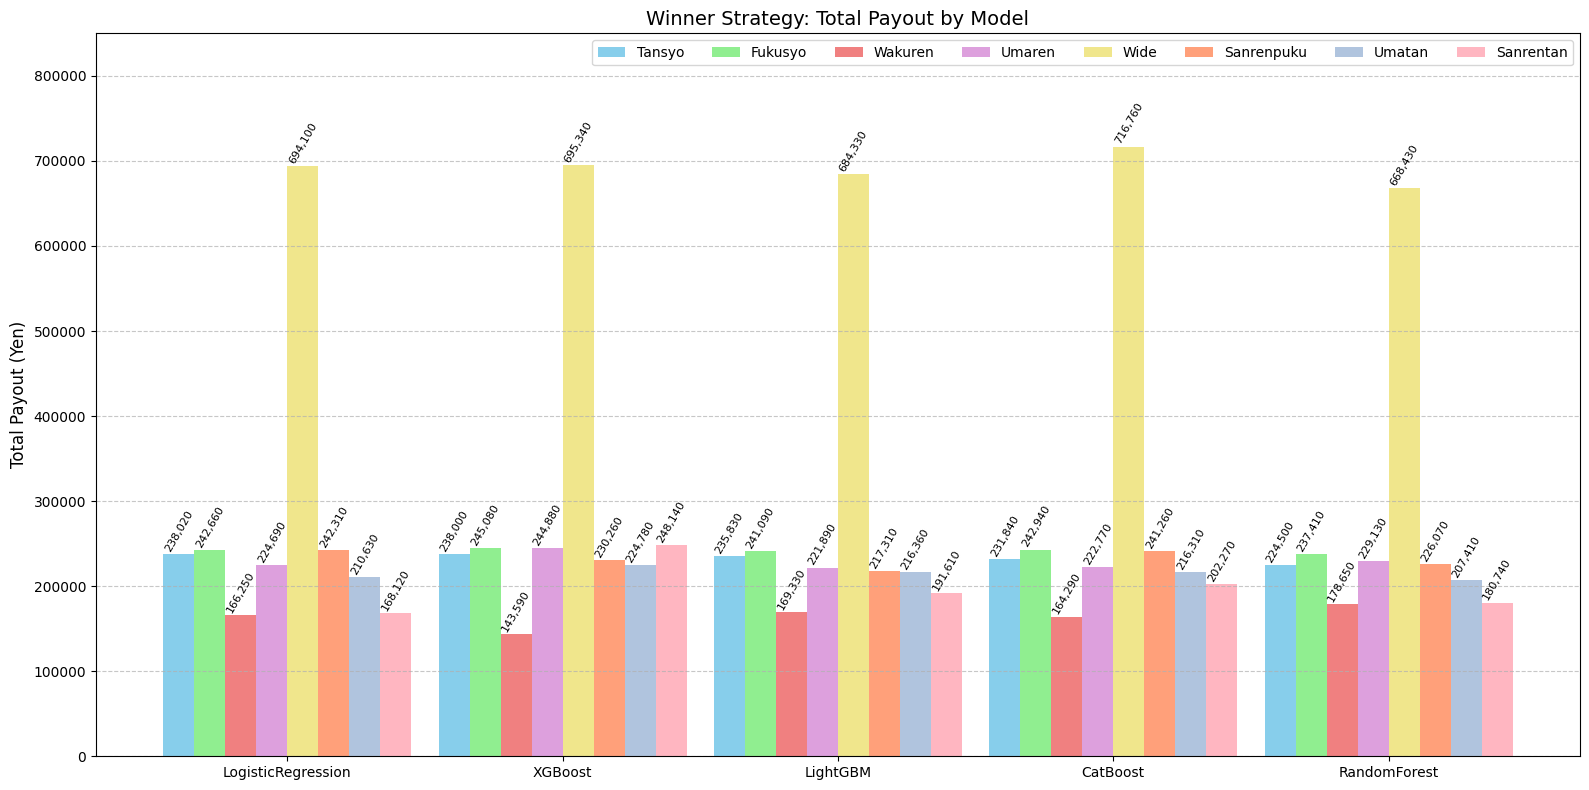

In [101]:
# 1. Extract data
rows = []
for model_name in results_winner_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_winner_tansyo[model_name]["total_payout"],
        "Fukusyo": results_winner_fukusyo[model_name]["total_payout"],
        "Wakuren": results_winner_wakuren[model_name]["total_payout"],
        "Umaren": results_winner_umaren[model_name]["total_payout"],
        "Wide": results_winner_wide[model_name]["total_payout"],
        "Sanrenpuku": results_winner_sanrenpuku[model_name]["total_payout"],
        "Umatan": results_winner_umatan[model_name]["total_payout"],
        "Sanrentan": results_winner_sanrentan[model_name]["total_payout"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .sort_values(by="Tansyo", ascending=False)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. Formatting
plt.title("Winner Strategy: Total Payout by Model", fontsize=14)
plt.ylabel("Total Payout (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 850000)
plt.show()

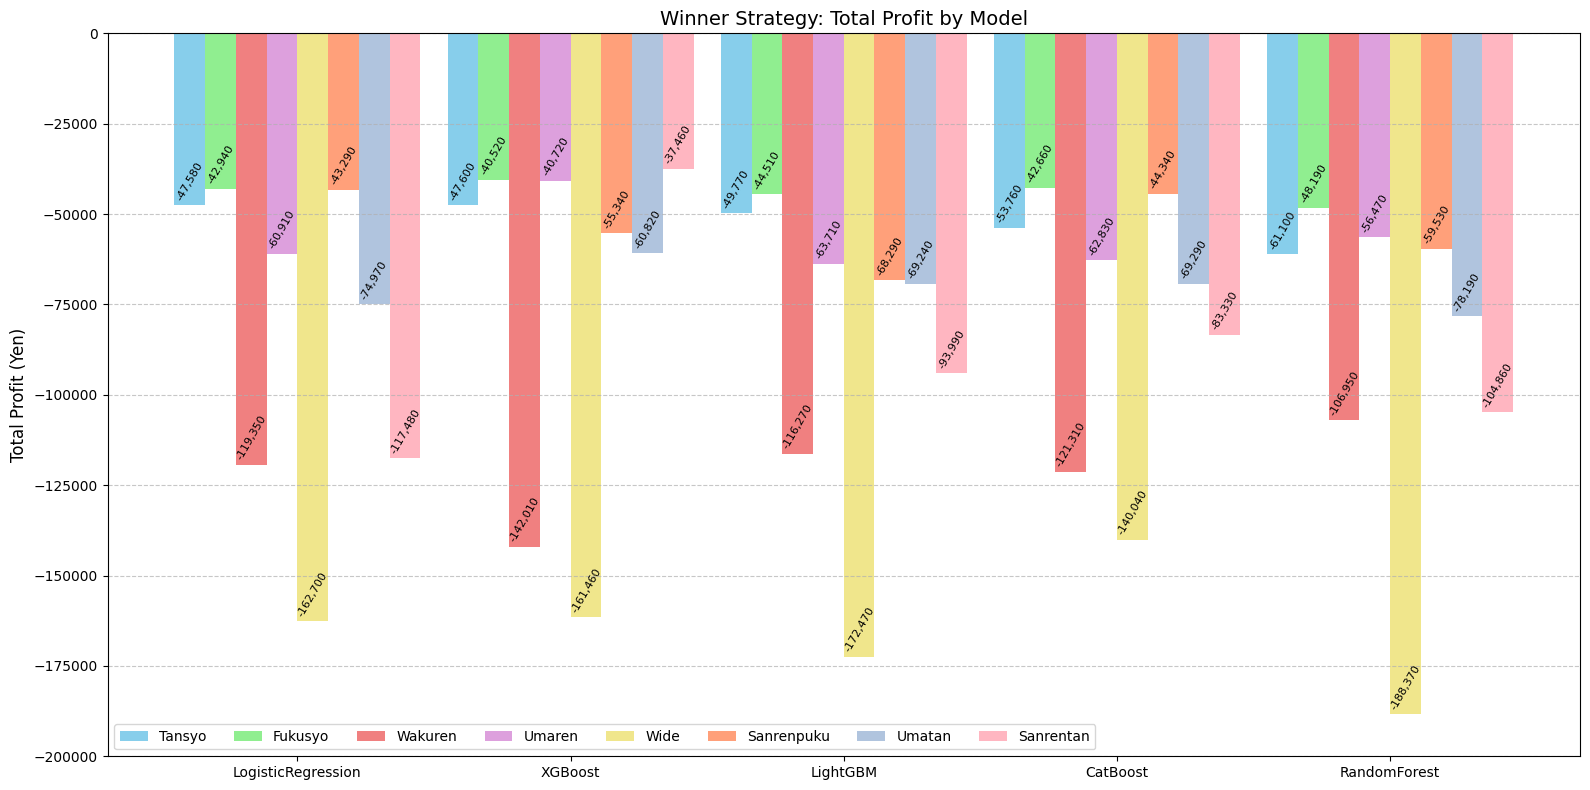

In [103]:
# 1. Extract data
rows = []
for model_name in results_winner_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_winner_tansyo[model_name]["profit"],
        "Fukusyo": results_winner_fukusyo[model_name]["profit"],
        "Wakuren": results_winner_wakuren[model_name]["profit"],
        "Umaren": results_winner_umaren[model_name]["profit"],
        "Wide": results_winner_wide[model_name]["profit"],
        "Sanrenpuku": results_winner_sanrenpuku[model_name]["profit"],
        "Umatan": results_winner_umatan[model_name]["profit"],
        "Sanrentan": results_winner_sanrentan[model_name]["profit"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .sort_values(by="Tansyo", ascending=False)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. Formatting
plt.title("Winner Strategy: Total Profit by Model", fontsize=14)
plt.ylabel("Total Profit (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(-200000, 0)
plt.show()